In [11]:
import gymnasium as gym
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env
import os

In [2]:
!python3 -m atari_py.import_roms ./roms/ROMS

/usr/bin/python3: Error while finding module specification for 'atari_py.import_roms' (ModuleNotFoundError: No module named 'atari_py')


In [3]:
!pip install ale-py

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import gymnasium as gym
import time
import ale_py

gym.register_envs(ale_py)

env = gym.make('ALE/Breakout-v5',render_mode="human")
env.reset()
# obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
# env.render()



(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], shape=(210, 160, 3), dtype=uint8),
 {'lives': 5, 'episode_frame_number': 0, 'frame_number': 0})

In [10]:
env.action_space
# env.close()

Discrete(4)

In [11]:
env.observation_space

Box(0, 255, (210, 160, 3), uint8)

In [20]:
episodes = 5

for episode in range(1, episodes + 1):
    obs, info = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()  # Random action
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        score += reward

    print(f"Episode: {episode}  Score: {score}")

env.close()


Episode: 1  Score: 2.0


KeyboardInterrupt: 

In [ ]:
episode = 5
for episode in range(1,episodes+1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        obs , reward ,done, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}',format(episode, score))

A.L.E: Arcade Learning Environment (version 0.11.1+2750686)
[Powered by Stella]


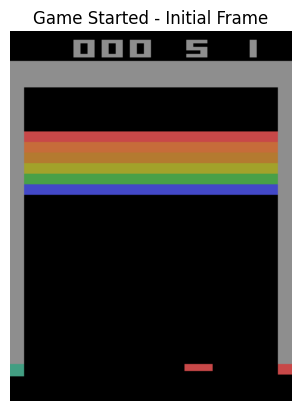

Game running! Close window or press Ctrl+C to stop.
Episode:1 Score:3.0
Episode:2 Score:2.0
Episode:3 Score:3.0
Episode:4 Score:2.0
Episode:5 Score:2.0


In [1]:
import gymnasium as gym
import ale_py
import pygame
import matplotlib.pyplot as plt
import time

# Register environments
gym.register_envs(ale_py)

# Create environment
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
obs, info = env.reset()

# Show initial frame with matplotlib
img = env.render()
plt.imshow(img)
plt.title("Game Started - Initial Frame")
plt.axis("off")
plt.show()

# Initialize pygame window
pygame.init()
screen = pygame.display.set_mode((img.shape[1], img.shape[0]))
pygame.display.set_caption("Breakout Game")

print("Game running! Close window or press Ctrl+C to stop.")

episodes = 5

try:
    for episode in range(1, episodes + 1):
        obs, info = env.reset()
        done = False
        score = 0
        
        while not done:
            # Handle window close
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    raise KeyboardInterrupt
            
            # Game step
            action = env.action_space.sample()
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            score += reward
            
            # Display frame
            rgb_array = env.render()
            surf = pygame.surfarray.make_surface(rgb_array.swapaxes(0, 1))
            screen.blit(surf, (0, 0))
            pygame.display.flip()
            
            time.sleep(0.05)
        
        print('Episode:{} Score:{}'.format(episode, score))
        time.sleep(1)  # Pause between episodes

except KeyboardInterrupt:
    pass

finally:
    pygame.quit()
    env.close()

In [7]:
env = make_atari_env("Breakout-v0",n_envs=4, seed=0)
env = VecFrameStack(env, n_stack=4)

/home/illusion/.local/lib/python3.10/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment Breakout-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


In [8]:
env.reset()

array([[[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        ...,

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]],


       [[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0

In [9]:
env.render()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(420, 320, 3), dtype=uint8)

In [10]:
log_path = os.path.join('Training','Logs')
model = A2C('CnnPolicy',env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=1000000)

Logging to Training/Logs/A2C_1
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 275      |
|    ep_rew_mean        | 1.43     |
| time/                 |          |
|    fps                | 261      |
|    iterations         | 100      |
|    time_elapsed       | 7        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.38    |
|    explained_variance | 0.0513   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.131    |
|    value_loss         | 0.153    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 283      |
|    ep_rew_mean        | 1.64     |
| time/                 |          |
|    fps                | 261      |
|    iterations         | 200      |
|    time_elapsed       | 15       |
|    total_timesteps    | 4000     |
| train

In [29]:
a2c_path = os.path.join('Training','Saved Models','A2C_2M_model')
model.save(a2c_path)

In [18]:
env= make_atari_env('Breakout-v0',n_envs=1,seed=0)
env= VecFrameStack(env,n_stack=4)


In [19]:
from stable_baselines3 import A2C
from gymnasium import make

# Dummy import for compatibility
import sys
import gymnasium as gym
sys.modules["gym"] = gym  # patch 'gym' to point to 'gymnasium'


model = A2C.load('Training/Saved Models/A2C_2M_model', env=env)


Wrapping the env in a VecTransposeImage.


ValueError: Observation spaces do not match: Box(0, 255, (4, 84, 84), uint8) != Box(0, 255, (4, 84, 84), uint8)

In [32]:
evaluate_policy(model,env,n_eval_episodes=50,render=True)

(np.float64(5.38), np.float64(2.4074052421642684))